In [159]:
import re
from pandas import read_csv
import seaborn as sn
from IPython import display as ICD


In [160]:
# Coleta e Tratamento dos Dados

dados = read_csv('./dados.csv')

columns = list(dados.columns)[2:]

dados = dados[dados['Região'] != 'Grande Vitória (ES)']

dados['Ano'] =  dados['Mês'].apply(lambda mes: re.findall('\d{4}',mes) [0])

dados['Mês'] = dados['Mês'].apply(lambda mes: re.findall('\w+', mes)[0])

for column in columns:
    dados[column] = dados[column].apply(lambda value: value.replace(',', '.')).astype(float)
    

def categorizar_cidade(city): return 'Nordeste' if city in ['Fortaleza (CE)', 'Recife (PE)', 'Salvador (BA)'] else \
    'Sudeste' if city in ['Belo Horizonte (MG)', 'Rio de Janeiro (RJ)', 'São Paulo (SP)'] else \
    'Sul' if city in ['Curitiba (PR)', 'Porto Alegre (RS)'] else \
    'Norte' if city == 'Belém (PA)' else 'Outra região'
    
dados['Zona'] = dados['Região'].apply(categorizar_cidade)
    

In [161]:
# Calculo do IPCA Mensal

IPCA = dados['Alimentação'] * (dados['Alimentação (Peso)']/ 100)

for index in range(1,9):
    IPCA = IPCA + (dados[columns[index]] * (dados[columns[index + 9]] / 100))

dados['IPCA'] = IPCA / 9

In [162]:
# Agrupando os Dados

agrupado_regiao = dados.groupby('Região')
agrupado_zona = dados.groupby('Zona')
agrupado_ano = dados.groupby('Ano')
agrupado_mes = dados.groupby('Mês')
agrupado_ano_mes = dados.groupby(['Mês', 'Ano'])


<Axes: >

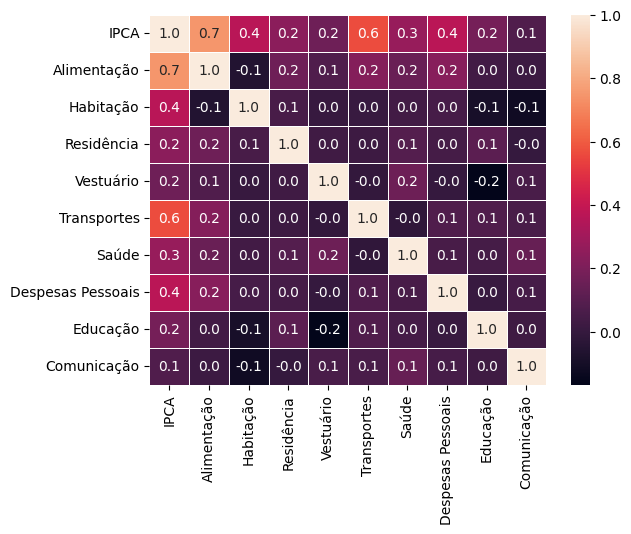

In [163]:
# Gráfico de Mapa de Calor considerando os Meses dos Anos

correlacao = dados[['IPCA', *columns[:9]]].corr('pearson')

plot = sn.heatmap(correlacao, annot=True, fmt=".1f", linewidths=.6)

plot


<Axes: >

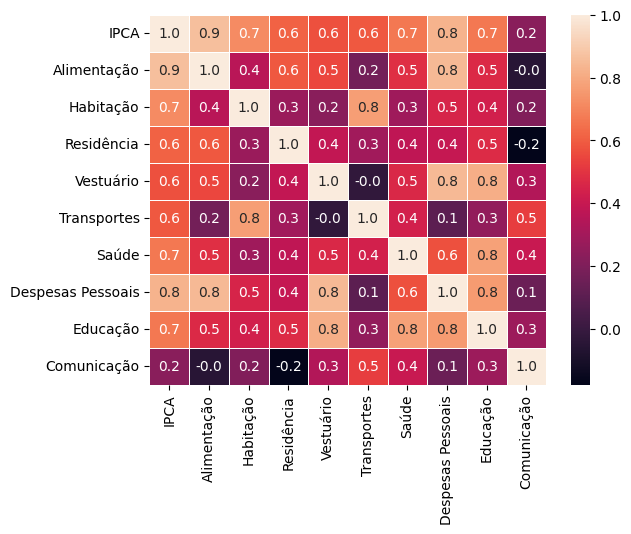

In [164]:
# Gráfico de Mapa de Calor considerando o Total dos Anos

correlacao = agrupado_ano[['IPCA', *columns[:9]]].sum().corr('pearson')

plot = sn.heatmap(correlacao, annot=True, fmt=".1f", linewidths=.6)

plot


<Axes: >

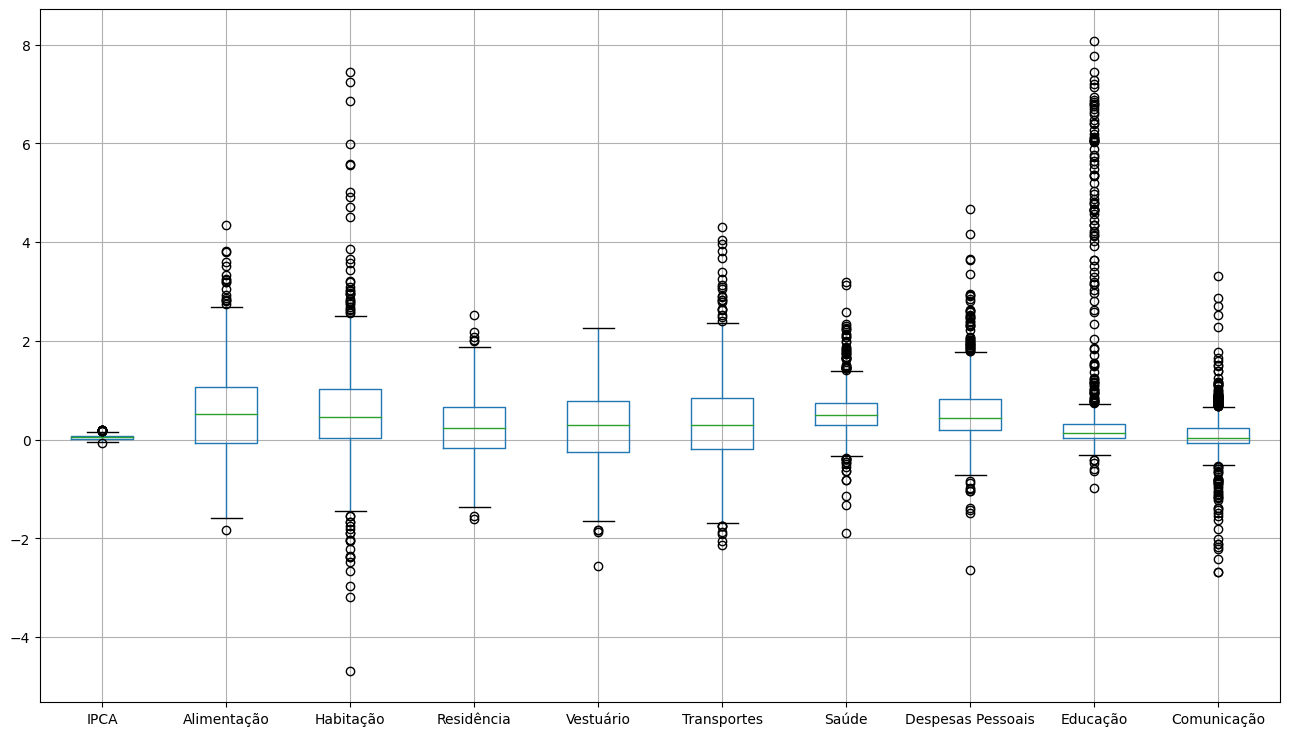

In [165]:
# Box Plot Mensal

dados[['IPCA',*columns[:9]]].boxplot(return_type='axes', figsize=(16,9))

/tmp/ipykernel_74145/2985076162.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  agrupado_ano.sum()[['IPCA',*columns[:9]]].boxplot(return_type='axes', figsize=(16,9))


<Axes: >

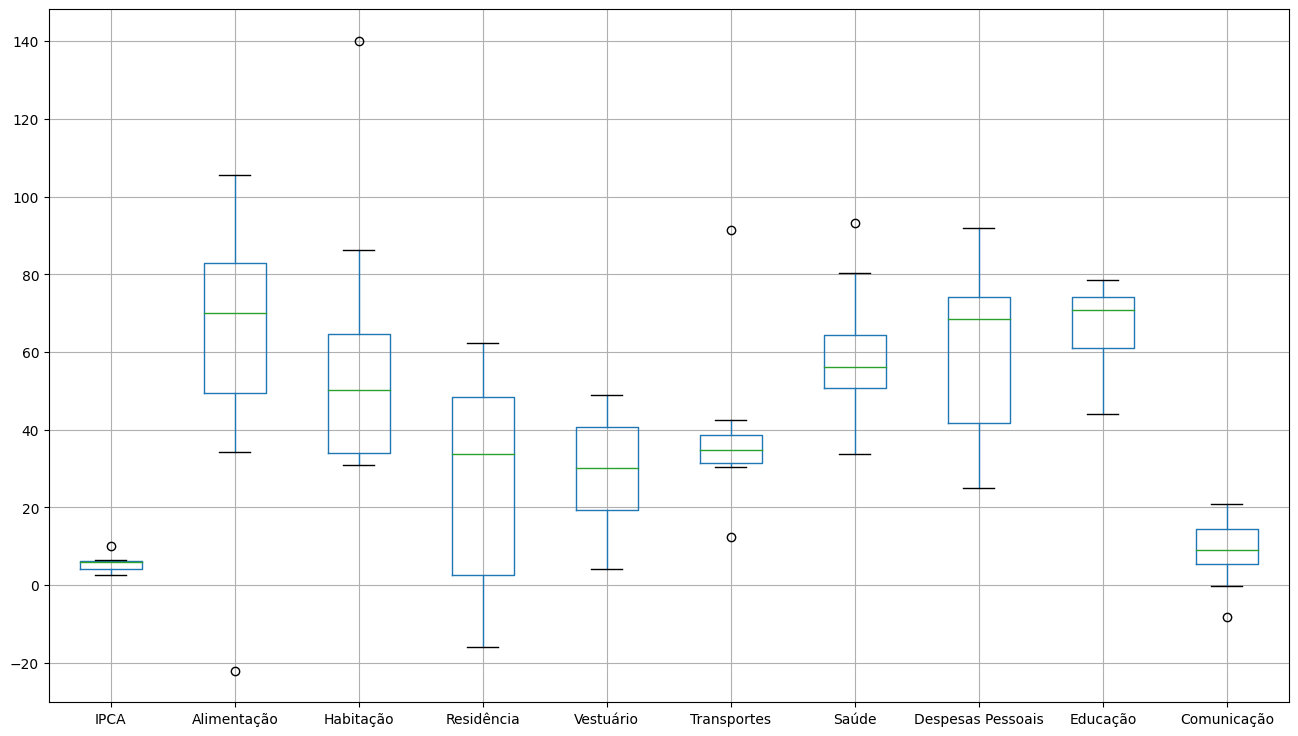

In [166]:
# Box Plot Anual

agrupado_ano.sum()[['IPCA',*columns[:9]]].boxplot(return_type='axes', figsize=(16,9))

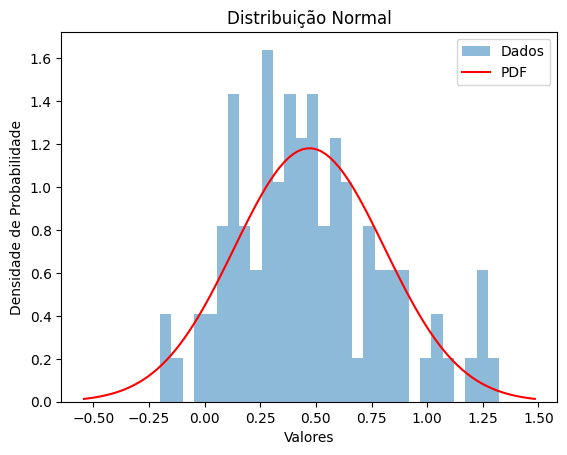

In [167]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Gerar uma amostra de dados seguindo uma distribuição normal
data = agrupado_ano_mes['IPCA'].sum()
mu = data.mean()  # Média
sigma = data.std()  # Desvio padrão

# Calcular estatísticas básicas
mean = np.mean(data)
std = np.std(data)
variance = np.var(data)

# Plotar o histograma dos dados
plt.hist(data, bins=30, density=True, alpha=0.5, label='Dados')

# Plotar a função de densidade de probabilidade (PDF)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)

pdf = norm.pdf(x, mu, sigma)

plt.plot(x, pdf, 'r', label='PDF')

plt.title('Distribuição Normal')
plt.xlabel('Valores')
plt.ylabel('Densidade de Probabilidade')
plt.legend()
plt.show()

In [168]:
for region, rdata in agrupado_regiao:
    print(region)
    rdata_mes = rdata.groupby('Ano')
    
    ICD.display(rdata_mes[['IPCA', *columns[:9]]].sum())
    
ICD.display(agrupado_ano[['IPCA', *columns[:9]]].sum())

Belo Horizonte (MG)


,IPCA,Alimentação,Habitação,Residência,Vestuário,Transportes,Saúde,Despesas Pessoais,Educação,Comunicação
Ano,,,,,,,,,,
2012,0.652724,8.94,7.27,0.57,8.95,0.25,5.14,11.14,8.67,0.30
2013,0.624342,7.59,4.14,7.46,4.80,1.65,6.68,9.50,8.58,2.37
2014,0.632027,6.83,7.57,6.12,4.06,2.49,6.11,7.58,8.97,-0.27
2015,0.984677,9.28,14.36,4.56,3.58,9.06,7.80,8.50,9.22,2.95
2016,0.712180,9.34,4.02,4.72,2.63,3.83,10.26,8.04,9.43,0.95
2017,0.224332,-4.10,4.60,0.49,1.46,3.83,5.31,3.08,7.11,2.32
2018,0.437650,3.75,5.22,4.27,0.83,4.77,4.22,3.87,4.38,-0.14
2019,0.459119,7.64,3.29,0.27,0.58,3.27,4.73,4.50,2.72,1.83


Belém (PA)


,IPCA,Alimentação,Habitação,Residência,Vestuário,Transportes,Saúde,Despesas Pessoais,Educação,Comunicação
Ano,,,,,,,,,,
2012,0.889726,13.48,7.65,2.01,3.87,3.55,5.93,9.48,7.27,1.01
2013,0.579421,5.63,3.67,5.61,7.12,3.97,5.37,6.96,7.45,0.25
2014,0.711270,6.97,12.89,6.41,1.87,4.22,5.79,6.60,6.61,0.33
2015,1.056936,10.61,13.56,5.18,5.97,8.99,9.01,11.06,6.80,3.06
2016,0.731006,9.99,3.53,3.87,2.86,1.90,9.68,6.99,8.42,0.92
2017,0.125745,-4.36,6.26,-1.35,0.87,5.38,4.53,3.51,6.27,4.04
2018,0.328961,1.64,7.93,1.28,1.79,4.89,0.60,2.34,4.99,0.67
2019,0.598710,7.74,4.24,0.74,1.51,4.88,6.15,6.04,5.48,0.78


Curitiba (PR)


,IPCA,Alimentação,Habitação,Residência,Vestuário,Transportes,Saúde,Despesas Pessoais,Educação,Comunicação
Ano,,,,,,,,,,
2012,0.620783,8.93,6.51,0.15,7.79,0.39,5.44,11.13,6.59,0.91
2013,0.613575,6.54,3.40,11.50,6.55,3.57,6.91,6.74,7.89,1.42
2014,0.718383,8.61,10.93,4.21,2.03,2.78,7.42,8.08,8.56,-1.39
2015,1.323483,13.07,21.31,7.80,7.70,9.86,9.69,9.58,9.62,2.89
2016,0.483255,7.33,-2.01,-0.15,3.40,3.77,8.16,6.86,9.92,1.18
2017,0.373745,-2.57,7.11,-1.89,2.35,6.33,6.47,3.76,7.16,3.50
2018,0.371679,4.45,5.12,3.73,-0.15,1.52,4.12,3.46,4.73,0.29
2019,0.436581,6.86,2.43,-0.95,0.11,3.18,4.72,5.71,3.40,1.22


Fortaleza (CE)


,IPCA,Alimentação,Habitação,Residência,Vestuário,Transportes,Saúde,Despesas Pessoais,Educação,Comunicação
Ano,,,,,,,,,,
2012,0.723172,12.57,2.47,-1.91,4.42,0.85,5.52,12.10,8.89,1.21
2013,0.690043,8.02,5.05,5.63,2.73,5.26,6.67,7.81,8.15,1.13
2014,0.653329,6.85,10.00,2.61,0.63,3.65,5.83,7.75,9.17,-1.19
2015,1.209225,12.24,13.98,6.93,2.14,13.05,9.46,12.49,8.25,2.07
2016,0.893964,11.47,6.33,4.19,4.47,3.06,10.99,10.42,8.78,0.78
2017,0.249859,-3.36,6.47,-1.28,3.59,7.28,6.07,2.02,7.47,0.69
2018,0.318886,2.84,2.41,2.53,-0.42,4.04,3.84,2.10,7.38,-0.31
2019,0.545480,5.71,6.58,0.37,1.17,4.35,5.36,5.91,6.03,-0.71


Porto Alegre (RS)


,IPCA,Alimentação,Habitação,Residência,Vestuário,Transportes,Saúde,Despesas Pessoais,Educação,Comunicação
Ano,,,,,,,,,,
2012,0.602368,9.47,5.15,2.49,4.65,-0.25,5.79,9.13,8.42,1.99
2013,0.626741,8.97,2.59,5.57,2.79,3.70,6.81,6.91,7.27,2.13
2014,0.730062,8.14,9.92,5.75,3.52,3.95,5.89,8.83,8.26,-1.31
2015,1.187304,13.02,16.97,7.58,4.01,11.09,8.78,8.35,7.98,1.30
2016,0.749535,8.62,2.44,4.92,5.93,5.71,10.20,7.62,10.29,2.43
2017,0.277476,-1.43,4.74,-1.15,0.89,4.05,5.89,3.91,7.35,1.95
2018,0.503519,5.96,7.17,4.24,-0.61,4.57,3.70,3.20,4.27,-0.20
2019,0.446747,5.09,2.45,-0.87,2.30,3.18,6.78,5.39,5.50,1.41


Recife (PE)


,IPCA,Alimentação,Habitação,Residência,Vestuário,Transportes,Saúde,Despesas Pessoais,Educação,Comunicação
Ano,,,,,,,,,,
2012,0.732789,11.04,7.21,-0.32,2.70,2.10,5.43,11.58,9.48,1.25
2013,0.739772,9.14,5.05,6.86,8.71,3.63,6.43,8.55,6.64,0.27
2014,0.683251,6.95,10.91,3.74,4.86,3.04,6.56,6.99,5.42,-0.02
2015,1.079829,12.69,11.51,7.09,3.16,11.49,8.87,7.37,8.22,3.07
2016,0.765401,8.96,5.68,7.73,3.53,5.16,10.41,5.91,5.22,1.14
2017,0.362388,-2.70,8.62,-3.79,3.28,7.57,5.95,4.43,7.24,2.31
2018,0.313217,3.16,2.29,3.01,0.93,1.71,4.72,2.93,6.00,-0.17
2019,0.405780,5.86,2.08,-1.27,1.05,3.56,5.27,2.59,5.56,0.05


Rio de Janeiro (RJ)


,IPCA,Alimentação,Habitação,Residência,Vestuário,Transportes,Saúde,Despesas Pessoais,Educação,Comunicação
Ano,,,,,,,,,,
2012,0.790701,9.04,8.77,0.78,6.38,4.43,6.84,12.46,7.31,-0.53
2013,0.666768,8.99,4.75,7.69,5.08,3.17,7.60,6.26,7.52,1.45
2014,0.817140,9.63,8.53,6.29,5.05,5.95,6.65,8.28,9.19,-0.36
2015,1.117831,10.85,17.62,2.61,3.20,9.19,9.26,9.39,9.30,-0.08
2016,0.685005,7.06,1.12,3.66,1.86,7.00,10.94,9.08,10.05,0.47
2017,0.332688,-0.90,6.34,-2.52,3.45,1.77,6.96,3.62,7.50,1.79
2018,0.469298,3.36,4.07,4.20,0.80,8.06,5.18,1.58,5.76,0.29
2019,0.441912,4.24,4.63,-0.75,0.49,2.49,5.75,5.95,5.38,0.96


Salvador (BA)


,IPCA,Alimentação,Habitação,Residência,Vestuário,Transportes,Saúde,Despesas Pessoais,Educação,Comunicação
Ano,,,,,,,,,,
2012,0.670071,10.95,7.35,0.23,3.97,2.37,5.06,6.77,6.62,1.14
2013,0.547025,8.43,0.06,4.88,5.92,2.31,5.37,6.11,9.66,2.87
2014,0.624983,6.27,9.06,7.76,2.62,2.00,7.34,7.44,8.61,-0.22
2015,1.049719,12.93,11.04,2.78,3.77,8.51,8.25,10.52,9.11,3.50
2016,0.725978,9.20,6.41,5.09,3.84,1.96,11.33,6.70,8.49,0.92
2017,0.235728,-2.14,5.84,-3.86,3.12,3.10,4.83,4.21,8.52,1.63
2018,0.441796,4.77,5.34,5.13,0.47,4.44,3.31,2.33,5.51,-0.18
2019,0.430699,4.96,4.17,-1.01,-0.54,4.40,4.51,4.50,5.09,0.79


São Paulo (SP)


,IPCA,Alimentação,Habitação,Residência,Vestuário,Transportes,Saúde,Despesas Pessoais,Educação,Comunicação
Ano,,,,,,,,,,
2012,0.513628,8.35,5.19,0.82,5.38,-1.23,6.16,8.19,7.60,0.60
2013,0.659165,8.73,3.27,7.07,5.20,3.13,7.11,9.17,7.65,0.99
2014,0.660028,7.86,6.38,4.92,3.86,3.76,7.23,8.53,7.94,-3.66
2015,1.175565,10.79,19.75,5.26,4.64,10.28,9.19,8.88,9.58,2.15
2016,0.663710,7.60,3.44,1.86,3.20,3.86,11.29,7.55,8.05,1.59
2017,0.397033,-0.47,6.36,-0.60,4.25,3.20,7.42,5.55,6.53,0.72
2018,0.402671,4.36,4.53,3.27,0.44,3.30,4.12,3.15,5.28,-0.35
2019,0.500841,6.44,4.92,-0.08,1.22,4.07,5.36,3.65,4.79,1.14


,IPCA,Alimentação,Habitação,Residência,Vestuário,Transportes,Saúde,Despesas Pessoais,Educação,Comunicação
Ano,,,,,,,,,,
2012,6.195962,92.77,57.57,4.82,48.11,12.46,51.31,91.98,70.85,7.88
2013,5.746852,72.04,31.98,62.27,48.90,30.39,58.95,68.01,70.81,12.88
2014,6.230474,68.11,86.19,47.81,28.50,31.84,58.82,70.08,72.73,-8.09
2015,10.184569,105.48,140.10,49.79,38.17,91.52,80.31,86.14,78.08,20.91
2016,6.410034,79.57,30.96,35.89,31.72,36.25,93.26,69.17,78.65,10.38
2017,2.578996,-22.03,56.34,-15.95,23.26,42.51,53.43,34.09,65.15,18.95
2018,3.587676,34.29,44.08,31.66,4.08,37.30,33.81,24.96,48.30,-0.10
2019,4.265869,54.54,34.79,-3.55,7.89,33.38,48.63,44.24,43.95,7.47
